In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import json
import scipy
import librosa

In [ ]:
path_data = '/content/drive/MyDrive/Data/genres_original/'
genre = 'blues/'
filename = 'blues.00000.wav'

file_path = path_data + genre + filename

In [ ]:
fs = 22050 # sampling rate for librosa to resample to
audio_ex, fs = librosa.load(path=file_path, sr=fs) # load audio and sampling rate

In [ ]:
def plot_mfcc(mfcc, fs, fig_size=(12,6)):
    """Plots the mel-scaled spectrogram from mfccs. This is performing the same task as
    'plot_mel_spectrogram_audio' with just a different input.

    Parameters:
        mfcc (numpy.ndarray): mfccs of an audio signal
        fs (int): sampling frequency (Hz) of audio signal
        fig_size (tuple): Dimensions of figure
    """
    # Plot Spectrogram
    plt.figure(figsize=fig_size)

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    # abs on signal for better visualization
    librosa.display.specshow(data=mfcc, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')

    # Put a descriptive title on the plot
    plt.title('MFCCs')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

In [ ]:
from google.colab import drive
import os
import librosa
import numpy as np
import json
import math
drive.mount('/content/drive')
def get_mfccs(directory_path, fs=22500, duration=30, n_fft=2048, hop_length=512, n_mfcc=13, num_segments=10):
    data = {
        "genre_name": [],   # name of the genre (i.e. blues, classical, etc.)
        "genre_num": [],    # number value of the genre (i.e. 0, 1, 2, etc.)
        "mfcc": []            }
    samples_per_track = fs * duration # Calculate the number of samples for desired "duration" of track
    samps_per_segment = int(samples_per_track/num_segments) # number of samples per segment
    mfccs_per_segment = math.ceil(samps_per_segment/hop_length) # number of MFCC vectors per segment
    print("MFCC collection started!")
    print("========================")
    for i, (path_current, folder_names, file_names) in enumerate(os.walk(directory_path)):
        if path_current is not directory_path:
            path_list = path_current.split('/') # split the path into a list
            genre_current = path_list[-1] # select last item in path list (name of folder = genre)
            for file in file_names:
                file_path = os.path.join(path_current, file).replace(os.sep, '/') # create audio file path
                try:
                    audio, fs = librosa.load(file_path, sr=fs) # audio in samples, sampling rate
                    for seg in range(num_segments):
                        start_sample = seg * samps_per_segment # segment starting sample
                        end_sample = start_sample + samps_per_segment # segment ending sample
                        mfcc = librosa.feature.mfcc(y=audio[start_sample:end_sample],    # audio signal
                                                    sr=fs,                               # sampling rate (Hz)
                                                    n_fft=n_fft,                         # fft window size
                                                    hop_length=hop_length,               # hop size
                                                    n_mfcc=n_mfcc)                       # number of mfccs to compute
                        mfcc = mfcc.T # transpose for appropriate list appending
                        if len(mfcc) == mfccs_per_segment:
                            data["genre_name"].append(genre_current) # append current genre to list of genres
                            data["genre_num"].append(i-1) # append current genre to list of genres
                            data["mfcc"].append(mfcc.tolist()) # append current mfcc to list of mfccs
                except:
                    continue
            print(f"Collected MFCCs for {genre_current.title()}!")
    with open('/content/drive/MyDrive/Data/data.json', "w") as filepath:
        print("========================")
        print("Saving data to disk...")
        json.dump(data, filepath, indent=4)
        print("Saving complete!")
        print("========================")
    return np.array(data["mfcc"]), np.array(data["genre_name"]), np.array(data["genre_num"])
directory_path = '/content/drive/MyDrive/Data/genres_original'
mfccs, genres, genre_nums = get_mfccs(directory_path, fs=22500, duration=30, n_fft=2048, hop_length=512, n_mfcc=13, num_segments=10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MFCC collection started!
Collected MFCCs for Metal!
Collected MFCCs for Classical!
Collected MFCCs for Pop!
Collected MFCCs for Hiphop!
Collected MFCCs for Country!
Collected MFCCs for Blues!


<ipython-input-9-fe5fd73a401c>:60: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs) # audio in samples, sampling rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Collected MFCCs for Jazz!
Collected MFCCs for Reggae!
Collected MFCCs for Disco!
Collected MFCCs for Rock!
Saving data to disk...
Saving complete!


In [ ]:
import json

# Load the saved data
with open('/content/drive/MyDrive/Data/data.json', 'r') as f:
    data = json.load(f)

# Print a sample of the data
print(data['genre_name'][:5])  # طباعة أول 5 أنواع موسيقية
print(data['mfcc'][:5])         # طباعة أول 5 MFCCs


['metal', 'metal', 'metal', 'metal', 'metal']
[[[-187.8456268310547, 99.0294418334961, -26.600440979003906, 45.53174591064453, 9.629284858703613, 13.048311233520508, 14.693012237548828, 14.390624046325684, 1.8238329887390137, 0.32147079706192017, -13.026165008544922, -4.273688316345215, -1.2628934383392334], [-123.85202026367188, 91.83946228027344, -20.087657928466797, 43.16503143310547, 10.412191390991211, 15.840802192687988, 18.603408813476562, 14.516096115112305, -3.0936553478240967, 6.320423126220703, -16.062171936035156, 5.399058818817139, -7.286984920501709], [-121.76191711425781, 78.96400451660156, -4.166335105895996, 33.34897994995117, 18.84514045715332, 14.659141540527344, 19.260395050048828, 13.237786293029785, 1.0049030780792236, 17.888526916503906, -2.757636547088623, 8.771331787109375, -3.823338747024536], [-131.95462036132812, 64.6619873046875, -1.8775349855422974, 22.719337463378906, 21.221588134765625, 9.934892654418945, 14.343825340270996, 18.647470474243164, 3.9793729

In [ ]:
import librosa
import os
import numpy as np
import json
import math

# Define the sampling rate
fs = 22500  # Define the sampling rate

# Set up the parameters for the MFCC conversion
n_mfcc = 13
n_fft = 2048
hop_length = 512
num_segments = 10  # split track into 10 segments (3 sec each)
track_duration = 30  # Length of tracks (sec)

directory_path = '/content/drive/MyDrive/Data/genres_original/'

# Call the function to extract MFCCs
mfccs, genres, genre_nums = get_mfccs(directory_path,
                          fs=fs,
                          duration=track_duration,
                          n_fft=n_fft,
                          hop_length=hop_length,
                          n_mfcc=n_mfcc,
                          num_segments=num_segments)

# Check the shape of the output
print(f"MFCCs: {mfccs.shape}")
print(f"Genres: {genres.shape}")


MFCC collection started!
Collected MFCCs for Metal!
Collected MFCCs for Classical!
Collected MFCCs for Pop!
Collected MFCCs for Hiphop!
Collected MFCCs for Country!
Collected MFCCs for Blues!


<ipython-input-9-fe5fd73a401c>:60: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs) # audio in samples, sampling rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Collected MFCCs for Jazz!
Collected MFCCs for Reggae!
Collected MFCCs for Disco!
Collected MFCCs for Rock!
Saving data to disk...
Saving complete!
MFCCs: (9989, 132, 13)
Genres: (9989,)


In [ ]:
# Map target genre to number
genre_map = dict(zip(sorted(set(genres)), np.arange(0, 10)))
genres_num = np.array(pd.Series(genres).map(genre_map))
# list(zip(genres_num, genres)) # view mapped target

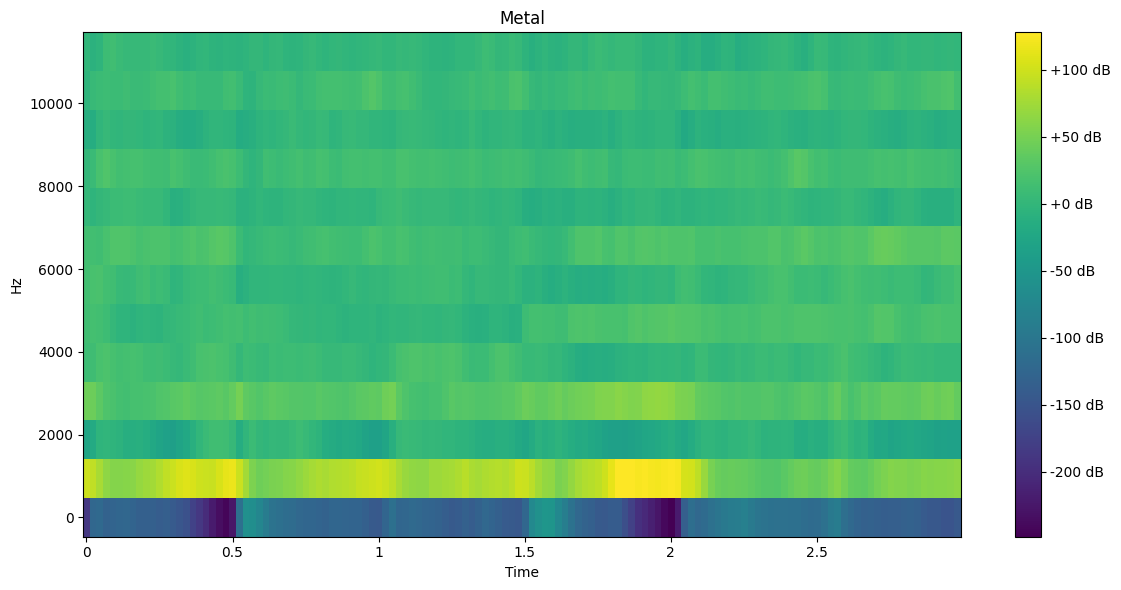

In [ ]:
# Plot an MFCC example
idx = 0
plot_mfcc(mfccs[idx].T, fs)
plt.title(f"{genres[idx].title()}");